<a href="https://colab.research.google.com/github/MayranAvila/TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd

In [ ]:
datos=pd.read_json('/content/TelecomX_Data.json')

In [ ]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Extraccion de diccionarios

In [ ]:

# Expandir las columnas anidadas
customer_expanded = datos['customer'].apply(pd.Series)
phone_expanded = datos['phone'].apply(pd.Series)
internet_expanded = datos['internet'].apply(pd.Series)
account_expanded = datos['account'].apply(pd.Series)

# Concatenar todo en un nuevo DataFrame
# Concatenar todo en un nuevo DataFrame
df_final = pd.concat([datos.drop(['customer', 'phone', 'internet', 'account'], axis=1),customer_expanded, phone_expanded, internet_expanded, account_expanded],
axis=1)



In [ ]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [ ]:
#columna charges
charges_expanded = df_final['Charges'].apply(pd.Series)

#concatenacion df fina
df_final = pd.concat([df_final.drop('Charges', axis=1), charges_expanded], axis=1)

In [ ]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [ ]:
df_final.shape

(7267, 21)

## Meta datos

In [ ]:
#conocer el conjunto de datos
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Valores nulos

In [ ]:
df_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


## Datos duplicado

In [ ]:
#datos duplicados
df_final.duplicated().sum()

np.int64(0)

## Valores unicos

In [ ]:
#valores unicos columnas obje
df_final['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [ ]:
#visulizar valore '' en la columna churn
df_final[df_final['Churn'] == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [ ]:
import numpy as np

# columnas tipo 'object'
categorical_cols = df_final.select_dtypes(include='object').columns

# Reemplazamos '' por NaN en esas columnas
df_final[categorical_cols] = df_final[categorical_cols].replace('', np.nan)



In [ ]:
#eliminar nulos
df_final.dropna(inplace=True)

In [ ]:
df_final['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [ ]:
#valores unicos
df_final.nunique()

,0
customerID,7043
Churn,2
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3


## Transformar tipo de dato

In [ ]:
# Reemplazar espacios en blanco (de cualquier longitud) por NaN
df_final['Total'] = df_final['Total'].replace(r'^\s*$', np.nan, regex=True)

# Ahora convertir a float
df_final['Total'] = df_final['Total'].astype(float)


In [ ]:
#eliminar nulos de la columna total
df_final.dropna(inplace=True)

In [ ]:
#Transformar columna seniorcitizen a obje
df_final['SeniorCitizen'] = df_final['SeniorCitizen'].astype(object)

In [ ]:
#comprobacion
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   object 
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

## Columna de cuentas diarias

In [ ]:
#calcular el valor diario con el valor mensual
df_final['Cuentas_diarias'] = df_final['Monthly'] / 30

In [ ]:
#comprobar columna nueva
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
df_final['Cuentas_diarias'].dtypes

dtype('float64')

#📊 Carga y análisis

## Análisis descriptivo

In [ ]:
#análisis descriptivo
df_final.describe()

,tenure,Monthly,Total,Cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


In [ ]:
#analisis decriptivo variable categoricas
df_final.describe(include='object')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5163,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


## Distribución de evasión

In [ ]:
df_final['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.734215
Yes,0.265785


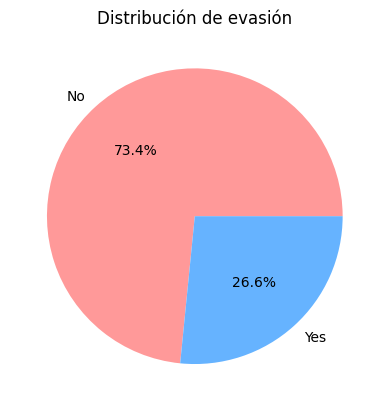

In [ ]:
#grafico de pastel
import matplotlib.pyplot as plt

#colores
colors = ['#ff9999','#66b3ff']

#grafico
plt.pie(df_final['Churn'].value_counts(), labels=df_final['Churn'].value_counts().index, autopct='%1.1f%%', colors=colors)

#titulo
plt.title('Distribución de evasión')

#mostrar
plt.show()

# Mostrar el gráfico
plt.show()

## Recuento de evasión por variables categoricas

In [ ]:
df_final['gender'].value_counts()

,count
gender,
Male,3549
Female,3483


In [ ]:
#agrupar la evasion por genero
df_final.groupby('gender')['Churn'].value_counts()



gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: count, dtype: int64

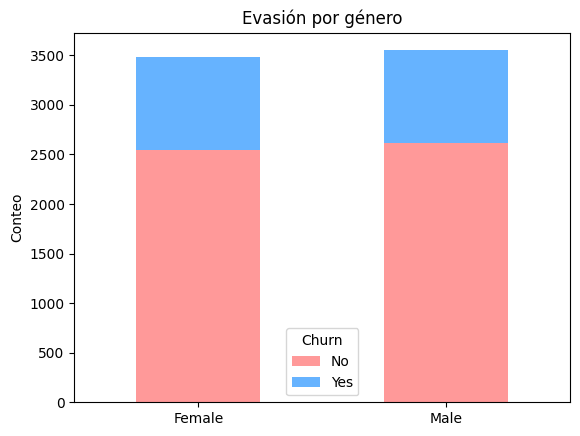

In [ ]:
#visulizacion de evasion por genero
#colores
colors = ['#ff9999','#66b3ff']
#  gráfico de barras apiladas
df_final.groupby('gender')['Churn'].value_counts().unstack().plot(kind='bar', stacked=True, color=colors)

#ejes
plt.xlabel('')
plt.ylabel('Conteo')
plt.title('Evasión por género')

plt.xticks(rotation=0)
#mostrar
plt.show()

In [ ]:
#evasion y tipo de contrato
df_final.groupby('Contract')['Churn'].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
Name: count, dtype: int64

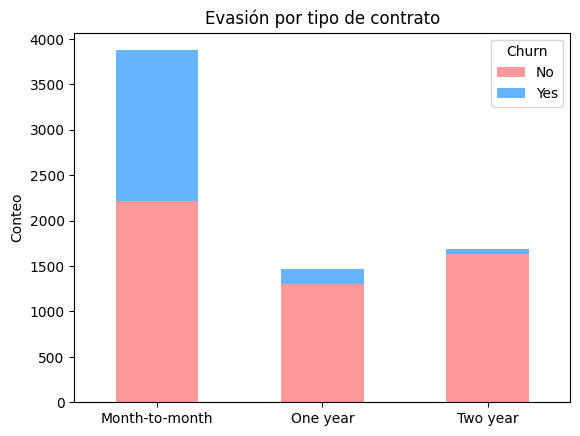

In [ ]:
#grafico de tipo de contrato y evasion
#colores
colors = ['#ff9999','#66b3ff']
#gráfico de barras apiladas
df_final.groupby('Contract')['Churn'].value_counts().unstack().plot(kind='bar', stacked=True, color=colors)

#ejes y titulo
plt.xlabel('')
plt.ylabel('Conteo')
plt.title('Evasión por tipo de contrato')
plt.xticks(rotation=0)
#mostrar
plt.show()

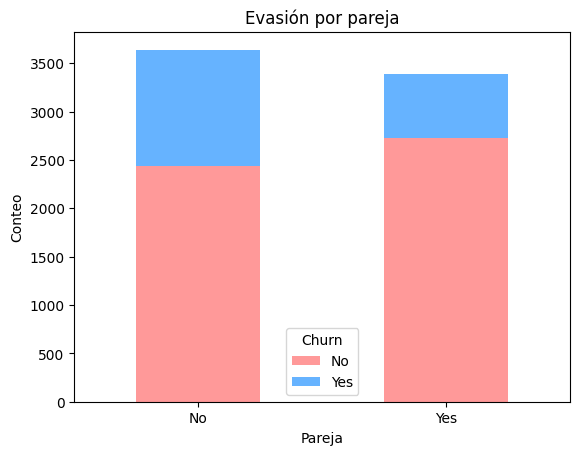

In [ ]:
#evasion y pareja grafica
#colores
colors = ['#ff9999','#66b3ff']
#gráfico de barras apiladas
df_final.groupby('Partner')['Churn'].value_counts().unstack().plot(kind='bar', stacked=True, color=colors)

#ejes
plt.xlabel('Pareja')
plt.ylabel('Conteo')
plt.title('Evasión por pareja')

#girar leyenda eje x
plt.xticks(rotation=0)
#mostrar
plt.show()

In [ ]:
#tabla cruzada por evasion y pareja
pd.crosstab(df_final['Partner'], df_final['Churn'])

Churn,No,Yes
Partner,,
No,2439,1200
Yes,2724,669


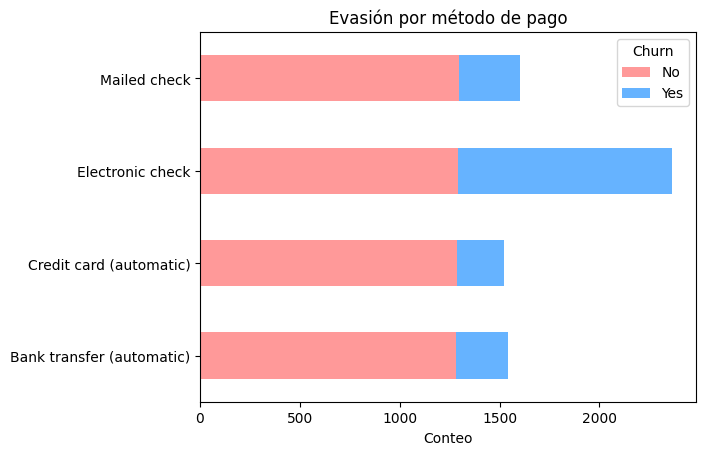

In [ ]:
#vasion y metodo de pago grafica
#colores
colors = ['#ff9999','#66b3ff']
#gráfico de barras apiladas
df_final.groupby('PaymentMethod')['Churn'].value_counts().unstack().plot(kind='barh', stacked=True, color=colors)

#ejes
plt.xlabel('Conteo')
plt.ylabel('')
plt.title('Evasión por método de pago')

#mostrar
plt.show()

In [ ]:
#tabla cruzada metodo de pago y churn
pd.crosstab(df_final['PaymentMethod'], df_final['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


## Evasión por variables numericas

/tmp/ipython-input-1779964322.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Monthly', data=df_final, palette='pastel')


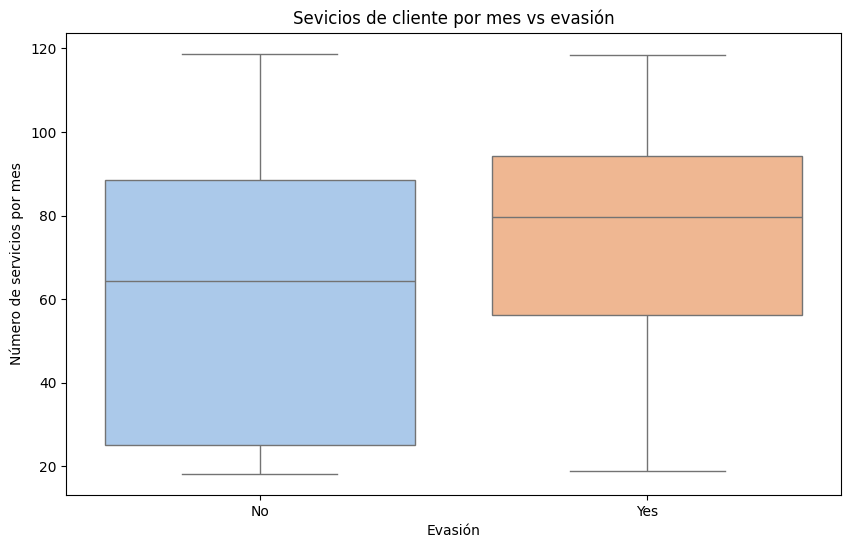

In [ ]:
#boxplot de meses y evasion
import seaborn as sns


#grafica boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Monthly', data=df_final, palette='pastel')



#ejes
plt.xlabel('Evasión')
plt.ylabel('Número de servicios por mes')
plt.title('Sevicios de cliente por mes vs evasión')

#mostrar
plt.show();



In [ ]:
#media de tiempo y evasion
df_final.groupby('Churn')['Monthly'].mean()

,Monthly
Churn,
No,61.307408
Yes,74.441332


/tmp/ipython-input-409127002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Total', data=df_final, palette='pastel')


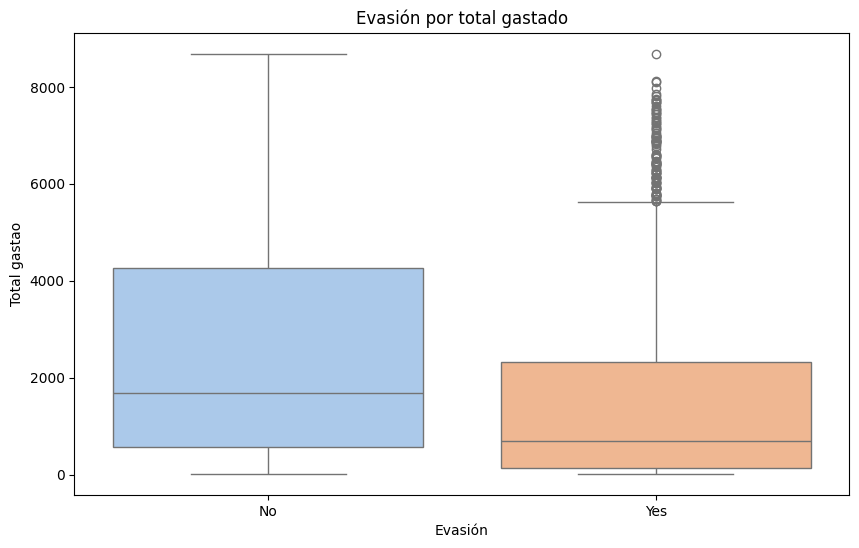

In [ ]:


#grafica
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Total', data=df_final, palette='pastel')

#ejes
plt.xlabel('Evasión')
plt.ylabel('Total gastao')
plt.title('Evasión por total gastado')



#mostrar
plt.show();


In [ ]:
#media del total por evasion
df_final.groupby('Churn')['Total'].mean()

,Total
Churn,
No,2555.344141
Yes,1531.796094


/tmp/ipython-input-2913177487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_final, palette='pastel')


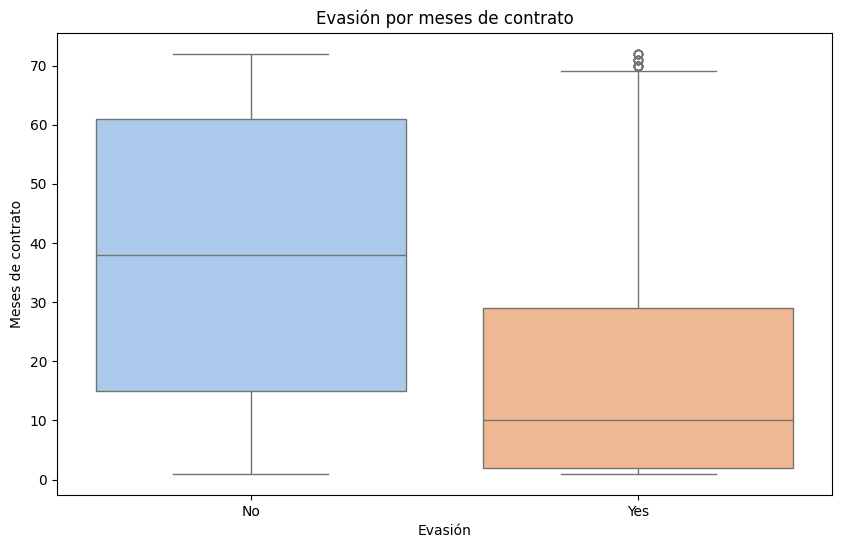

In [ ]:
#grafico de mese de contrato vs evasion
#grafica
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df_final, palette='pastel')

#ejes
plt.xlabel('Evasión')
plt.ylabel('Meses de contrato')
plt.title('Evasión por meses de contrato')



#mostrar
plt.show();


In [ ]:
#meses de contrato y evasion media
df_final.groupby('Churn')['tenure'].mean()

,tenure
Churn,
No,37.650010
Yes,17.979133


In [ ]:
#analisis de correlacion variables numericas
variables_numericas = ['Monthly', 'Total', 'tenure']
df_final[variables_numericas].corr()

,Monthly,Total,tenure
Monthly,1.000000,0.651065,0.246862
Total,0.651065,1.000000,0.825880
tenure,0.246862,0.825880,1.000000


#📄Informe final

##Introducción

En este desafío trabajamos en el proyecto "Churn de clientes" de la empresa Telecom X. La empresa tiene una alta tasa de cancelaciones por lo cual es importante comprender las causas que están ocasionando este problema.
Recibimos una base de datos con la información de los clientes de TelecomX. Nuestro trabajo, en una primera etapa, fue examinar, transformar y limpiar los datos, esto nos permitió tener información confiable para realizar el análisis y obtener metricas valiosas que nos podrían revelar la causa de las cancenlaciones.

##Limpieza y tratamiento de datos

Para la importación de los datos usamos la librería pandas para leer el archivo json, en la visualización de los datos notamos información anidada en las columnas, por lo cual, procedimos a liberar esa información para que en la base de datos final se pudieran visualizar como columnas.
En la primera etapa de limpieza y tratamiento de datos se realizaron las siguientes tareas: 1) Exploramos el tamaño de la base de datos con .shape; 2) obtuvimos los metadatos con .info(); 3) contabilizamos los datos nulos; 4) contabailizamos los datos duplicados y 5) verficamos los datos unicos para cada columna. En este ultimo paso, nos dimos cuenta que la columna de churn tenia datos en blanco, por lo cual procedimos a eliminarlos. Además del paso 2 identificamos que la columna total se ecnontraba en tipo de dato "object" por lo cual se tuvo que transformar a float.
Realizados estos pasos procedimos al análisis y creción de visualizaciones para obtener información valiosa.

##Análisis exploratorio de datos

El análisis exploratorio lo inciamos con la obtención de métricas clave para las variable numericas de la base de datos, para esto, utilizamos la funcion .describe().
La proporción de clientes que se han perdido es del 26.6% y los que aún se mantienen son el 73.4%.
Realizamos la asociación entre la vriable churn y otras variable categoricas del dataset. Lo que encontramos fue lo siguiente:
1. Los hombres prevalecen ligeramente como clientes y también como el grupo que tiene más evasiones comparado con las mujeres. Sin embargo, es importante recalcar que la diferencia es muy leve.
2. El tipo de contrato más comun entre los clientes es mes a mes y también representa el tipo de contrato con más evasión de clientes. Notamos que conforme aumenta el tiempo del tipo de contrato las evasiones son menores. Además el contrato por 2 años es el que menos evasion tiene.
3. Analisis la relación entre si el cliente tiene pareja y si esto aumenta la probabilidad de evasion, encontramos que los clientes que no tienen pareja tienen mayor tasa de evasión comparada con los clientes con pareja.
4. Con respecto a las formas de pago, encontramos una proporción similar entre los clientes que aun permanecen para las 4 formas de pago, sin embargo, resulta interesante que aquellas formas de pago que son menos "automaticas" tienen más indice de evasión, destancado el "electronic check".

Posteriormente analizamos la relación de la columna churn con las varibles numericas del dataset. Los hallazgos fueron los siguientes:
1. Atrvaés de un boxplot y obteniendo las medias de los clientes con evasión y sin ella y con respecto al total de los servicios de los clientes por mes, encontramos que aquellos que tienen más servicios al mes son los que tienden a evasión. CLiente con evasión una media de 74 y sin evasión una media de 61.
2. Los clientes con un total gastado menor son aquellos que tienen más evasión.
3. Aquellos que tienen menos meses de contrato son clientes con mayor evasión.

##Conclusiones

A partir de los análisis llegamos a la conclusión de que las características de las personas que tienden a evadir o dejar de ser clientes son las siguientes: 1)prevalencia ligera de que sea hombre, pero en general el genero no representa una diferencia importante, 2) que tenga un tipo de contrato mes a mes, 3) que no tenga pareja, 4) que su forma de pago sea por cheque electronico, 5) que contrate más de 74 servicios al mes y 6) que sus meses de contrato sean menores a 17.

##Recomendaciones

Con base a los datos las recomendaciones para retener a más clientes son:
1. Fomentar los métodos de pago más automaticos.
2. Buscar clientes con las siguientes características: hombres y mujeres (auqnue los hombre prevalecieron como evasores con respecto a las mujeres, las diferencias no son muy significativas) con pareja.
3. El tipo de contrato mes a mes, es de los que más atrae clientes, sin embargo, es también el que más evasión tiene, y esto aunado al descubrimiento de que aquellos clientes que tienen más de 74 serivicios al mes tienden a evadir mas, este tipo de contrato podría considerarse o seguirse promocionando pero con menos servicios al mes. Además de que podría foemntar el tipo de contrato de 2 años que es el segundo más popular y el que menos evasión tiene.
4. Establecer meses de contrato mayores a 17.
5.Realizar una encuesta de opinión para identificar fortalezas y debilidades en servicio.